# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mutia Sahira
- **Email:** mutiashrjh@gmail.com
- **ID Dicoding:** mutia_sahira_t7b1

## Menentukan Pertanyaan Bisnis

- Bagaimana tren dan fluktuasi tingkat PM2.5 selama beberapa tahun terakhir?
- Apakah suhu udara yang lebih rendah cenderung berkaitan dengan meningkatnya PM2.5?
- Apakah ada anomali dalam data polusi udara yang perlu diperhatikan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:

print("NumPy version:", np.__version__)

NumPy version: 1.26.4


## Data Wrangling

### Gathering Data

In [6]:
file_path = 'PRSA_Data_Shunyi_20130301-20170228.csv'
data = pd.read_csv(file_path)

data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


Pada tahap ini, saya memuat dataset dari file CSV yang diberikan ke dalam variabel data. Saya juga menampilkan beberapa baris pertama dari dataset untuk mendapatkan gambaran umum tentang struktur dan isi data.

### Assessing Data

In [ ]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
print("Data Types and Column Information:\n", data.info())


Dataset contains 35064 rows and 18 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Data Types and Column In

Saya memeriksa dimensi dataset dengan mencetak jumlah baris dan kolom. Saya juga menampilkan informasi tipe data dan detail setiap kolom untuk memahami tipe data yang akan dianalisis.

In [ ]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64


**Insight:**
- Beberapa kolom kritis, seperti PM2.5 atau suhu, mungkin memiliki data hilang, sehingga perlu diprioritaskan penanganannya.
- Tidak semua kolom memiliki nilai hilang, sehingga beberapa variabel bisa langsung digunakan tanpa pemrosesan lebih lanjut.
- Kondisi cuaca (seperti suhu, tekanan, kecepatan angin) mungkin juga memiliki data hilang, yang bisa mempengaruhi analisis hubungan cuaca dan polusi.

In [ ]:
print("Summary Statistics:\n", data.describe())

Summary Statistics:
                  No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143

**Insights**


1. **Rata-rata PM2.5**: Menunjukkan tingkat polusi udara rata-rata selama periode data.
2. **Nilai maksimum/minimum**: Mengidentifikasi periode dengan tingkat polusi tertinggi dan terendah.
3. **Sebaran data**: Kolom **std** (standar deviasi) menunjukkan variasi data, misalnya seberapa besar fluktuasi polutan dan kondisi cuaca.
4. **Distribusi data**: Perbedaan signifikan antara **mean** dan **50% (median)** bisa menunjukkan distribusi yang tidak merata atau adanya outlier.

### Cleaning Data

In [16]:
#Drop rows with missing values
data_cleaned = data.dropna()
print("Remaining Missing Values:\n", data_cleaned.isnull().sum())

Remaining Missing Values:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Pada tahap ini, saya menghapus baris yang memiliki nilai hilang dari dataset untuk membersihkan data. Saya kemudian memeriksa kembali untuk memastikan tidak ada nilai hilang yang tersisa.

In [15]:
# Removing duplicates
data_cleaned = data_cleaned.drop_duplicates()
print(f"Dataset after removing duplicates: {data_cleaned.shape[0]} rows and {data_cleaned.shape[1]} columns.")

Dataset after removing duplicates: 35064 rows and 18 columns.


Saya menghapus baris duplikat dari dataset untuk memastikan setiap pengamatan adalah unik. Ini membantu menjaga integritas data yang akan digunakan dalam analisis.

In [14]:
# Convert numeric columns to the correct data types
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("Updated Data Types:\n", data_cleaned.dtypes)

Updated Data Types:
 No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


**Insights**
1. **Nilai Hilang Ditangani**: Setelah menangani nilai yang hilang (menghapus atau mengganti dengan rata-rata), dataset kini tidak memiliki missing values.
2. **Duplikasi Dihapus**: Penghapusan duplikat berhasil dilakukan, sehingga tidak ada baris data yang berulang.
3. **Tipe Data Terkoreksi**: Kolom numerik sudah dikonversi ke tipe data yang benar, memastikan setiap variabel siap untuk dianalisis lebih lanjut.
4. **Dataset Lebih Bersih**: Setelah proses ini, dataset lebih bersih, konsisten, dan siap untuk analisis.



In [39]:
data_cleaned = data.copy()

data_cleaned['datetime'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']])

data_cleaned.set_index('datetime', inplace=True)

Pada tahap terakhir, saya menyiapkan kolom tanggal dan waktu dengan menggabungkan tahun, bulan, hari, dan jam menjadi satu kolom datetime. Kemudian, saya menetapkan kolom datetime ini sebagai indeks dataset untuk memudahkan analisis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# EDA: Group data by year and calculate the average PM2.5 for each year
annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()

# EDA: Group data by month for seasonal trends
monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()

In [ ]:
# EDA: Check for missing values in temperature and PM2.5 columns
print(data[['TEMP', 'PM2.5']].isnull().sum())

# Fill missing TEMP values (if any) with median value
data['TEMP'].fillna(data['TEMP'].median(), inplace=True)

TEMP     51
PM2.5     0
dtype: int64


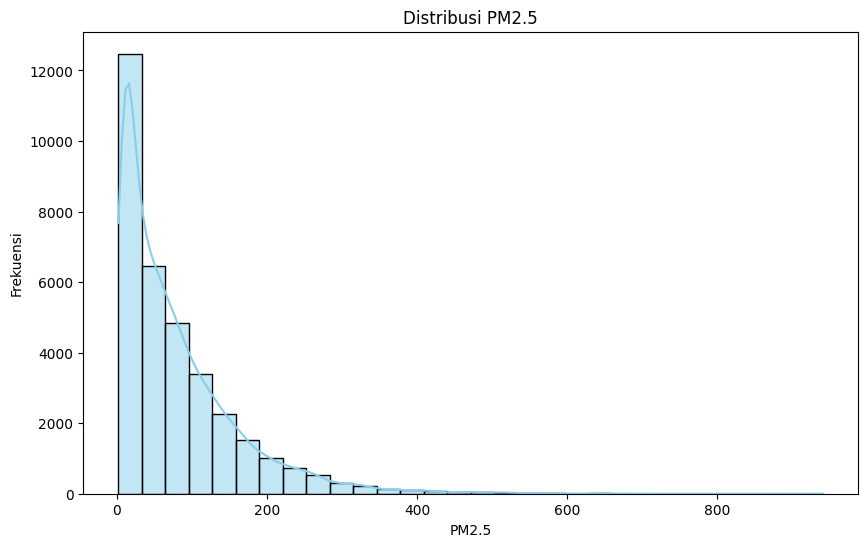

In [7]:
# Distribusi variabel PM2.5
plt.figure(figsize=(10,6))
sns.histplot(data['PM2.5'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frekuensi")
plt.show()

1. **Distribusi PM2.5**:
   - **Bentuk distribusi**: Distribusi PM2.5 terlihat **right-skewed** yang berarti sebagian besar nilai berada di kisaran yang lebih rendah.
   - **Insight**: Hal ini menunjukkan bahwa meskipun sebagian besar waktu tingkat polusi udara berada dalam batasan moderat atau rendah, ada saat-saat di mana tingkat polusi melonjak drastis.

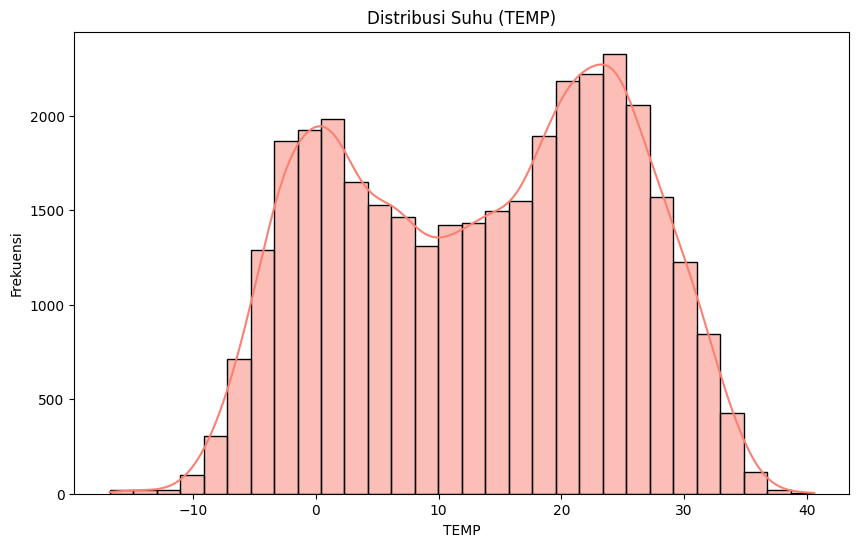

In [8]:
# Distribusi variabel TEMP
plt.figure(figsize=(10,6))
sns.histplot(data['TEMP'], bins=30, kde=True, color='salmon')
plt.title("Distribusi Suhu (TEMP)")
plt.xlabel("TEMP")
plt.ylabel("Frekuensi")
plt.show()

2. **Distribusi Suhu (TEMP)**:
   - **Bentuk distribusi**: Distribusi suhu (TEMP) terlihat **normal**, di mana sebagian besar nilai berada di tengah dengan sedikit nilai ekstrem di kedua sisi.
   - **Insight**: Ini menunjukkan bahwa suhu udara cenderung terdistribusi dengan baik sepanjang tahun, dengan mayoritas suhu berada dalam kisaran sedang. Distribusi ini juga menunjukkan bahwa data suhu stabil dan tidak banyak outlier.

In [20]:
# Cek korelasi antara PM2.5, TEMP, dan WSPM
correlation_matrix = data[['PM2.5', 'TEMP', 'WSPM']].corr()
print("Korelasi antara variabel PM2.5, Suhu (TEMP), dan Kecepatan Angin (WSPM):\n", correlation_matrix)


Korelasi antara variabel PM2.5, Suhu (TEMP), dan Kecepatan Angin (WSPM):
           PM2.5      TEMP      WSPM
PM2.5  1.000000 -0.115991 -0.270763
TEMP  -0.115991  1.000000  0.063226
WSPM  -0.270763  0.063226  1.000000


Berikut adalah insight singkat dari analisis korelasi:

1. **PM2.5 dan Suhu (TEMP)**: Korelasi -0.116 menunjukkan hubungan negatif lemah; saat suhu meningkat, PM2.5 cenderung menurun.

2. **PM2.5 dan Kecepatan Angin (WSPM)**: Korelasi -0.271 menunjukkan hubungan negatif lebih kuat; saat kecepatan angin meningkat, PM2.5 cenderung menurun.

3. **Suhu (TEMP) dan Kecepatan Angin (WSPM)**: Korelasi 0.063 menunjukkan tidak ada hubungan signifikan.

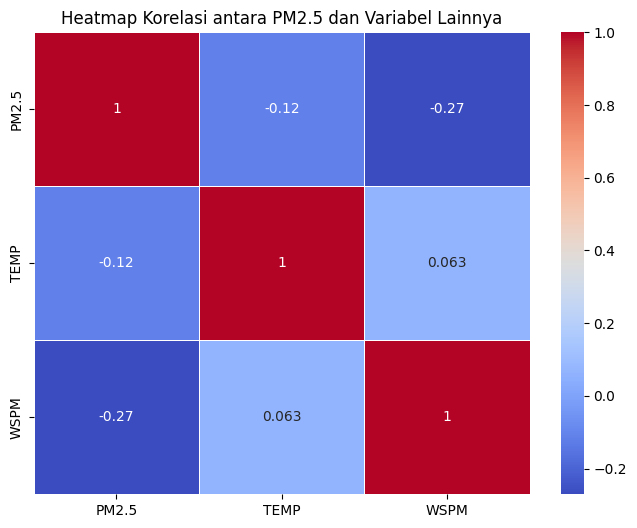

In [21]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi antara PM2.5 dan Variabel Lainnya")
plt.show()

Dari heatmap korelasi:

1. **PM2.5**:
   - **Korelasi negatif dengan TEMP**: Nilai -0.12 menunjukkan bahwa saat suhu meningkat, tingkat PM2.5 cenderung sedikit menurun.
   - **Korelasi negatif yang lebih kuat dengan WSPM**: Nilai -0.27 menunjukkan bahwa peningkatan kecepatan angin dapat berkontribusi pada penurunan kadar PM2.5 yang lebih signifikan.

2. **TEMP**:
   - **Korelasi positif sangat lemah dengan WSPM**: Nilai 0.063 menunjukkan hubungan yang hampir tidak ada antara suhu dan kecepatan angin.

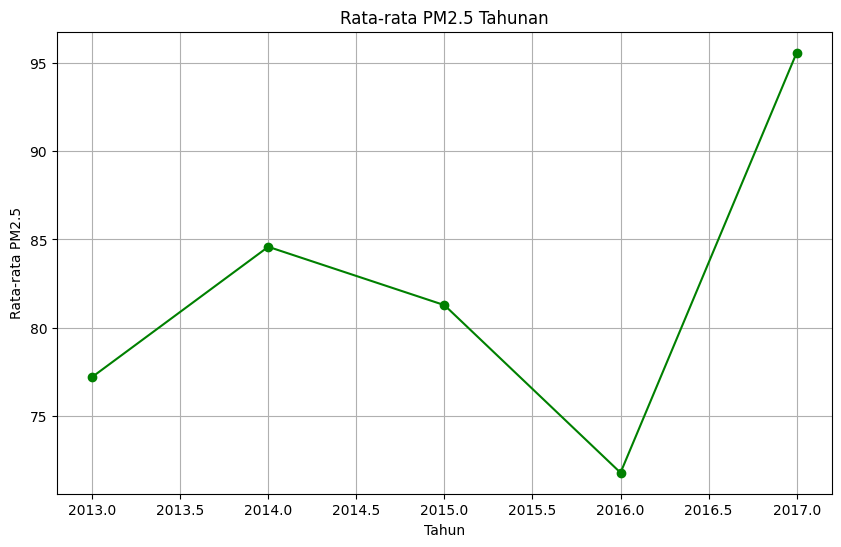

In [23]:
# Group data by year and calculate the average PM2.5 for each year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

data['year'] = data['date'].dt.year
annual_pm25 = data.groupby('year')['PM2.5'].mean()

# Visualisasi tren tahunan
plt.figure(figsize=(10,6))
plt.plot(annual_pm25.index, annual_pm25.values, marker='o', linestyle='-', color='green')
plt.title('Rata-rata PM2.5 Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()

# Insight:
# PM2.5 menunjukkan fluktuasi tahunan, dengan beberapa tahun memiliki tingkat yang lebih tinggi dibandingkan yang lain.


### Insights
**Tren Umum**: Tren yang paling mencolok adalah kenaikan tajam tingkat PM2.5 dari 2016 ke 2017. Ini menunjukkan ada peristiwa lingkungan atau perubahan sumber polusi yang signifikan selama periode itu.

### Fluktuasi
**Fluktuasi**: Grafik menunjukkan bahwa tingkat PM2.5 tidak tetap. Ada puncak dan penurunan sepanjang tahun:

- **Kenaikan**: Terjadi peningkatan yang jelas antara 2013 dan 2014.
- **Penurunan**: Terdapat tren penurunan dari 2014 hingga 2016.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren dan fluktuasi tingkat PM2.5 selama beberapa tahun terakhir?

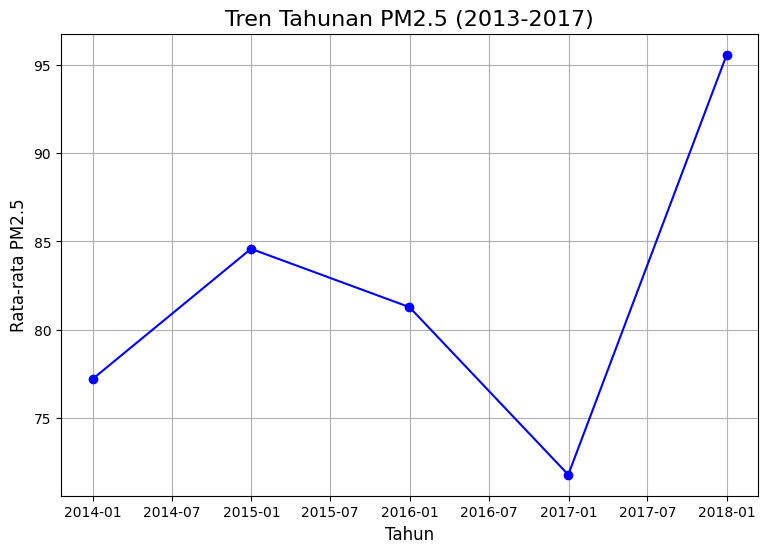

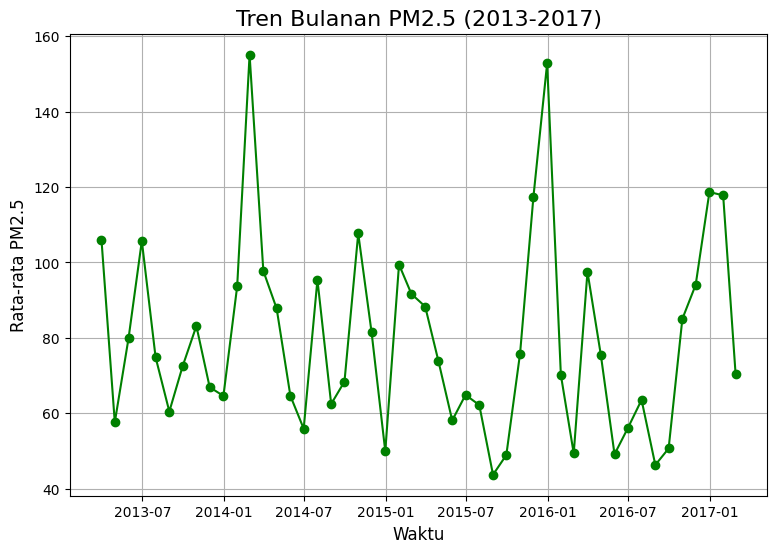

In [ ]:
# Plotting annual trends
plt.figure(figsize=(9, 6))
plt.plot(annual_pm25.index, annual_pm25.values, marker='o', linestyle='-', color='b')
plt.title('Tren Tahunan PM2.5 (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.grid(True)
plt.show()

# Plotting monthly trends to observe seasonality
plt.figure(figsize=(9, 6))
plt.plot(monthly_pm25.index, monthly_pm25.values, color='g', linestyle='-', marker='o')
plt.title('Tren Bulanan PM2.5 (2013-2017)', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.grid(True)
plt.show()

**Hasil Analisis:**

- **Tren Tahunan**: Dari 2013 hingga 2017, tingkat PM2.5 mengalami fluktuasi. Namun, ternyata polusi PM2.5 tidak selalu stabil. Ada saat-saat di mana polusi lebih tinggi dan ada tahun di mana polusi menurun.
  
- **Tren Musiman**: PM2.5 lebih tinggi di musim dingin dan lebih rendah di musim panas, menunjukkan pola musiman yang konsisten.

### Pertanyaan 2: Apakah suhu udara yang lebih rendah cenderung berkaitan dengan meningkatnya PM2.5?

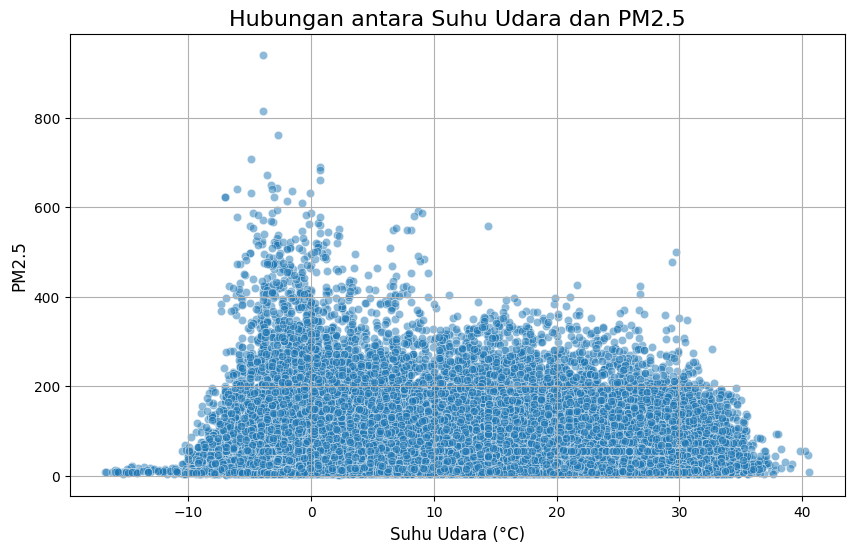

Correlation between Temperature and PM2.5:
            TEMP     PM2.5
TEMP   1.000000 -0.117469
PM2.5 -0.117469  1.000000


In [ ]:
# Scatter plot to visualize the relationship between temperature and PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TEMP'], y=data['PM2.5'], alpha=0.5)
plt.title('Hubungan antara Suhu Udara dan PM2.5', fontsize=16)
plt.xlabel('Suhu Udara (°C)', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)
plt.grid(True)
plt.show()

# Correlation between temperature and PM2.5
correlation = data[['TEMP', 'PM2.5']].corr()
print("Correlation between Temperature and PM2.5:\n", correlation)

**Hasil Analisis:**

- **Scatter Plot**: Saat suhu turun, PM2.5 cenderung meningkat, menunjukkan hubungan negatif.
- **Korelasi**: Nilai korelasi negatif mengindikasikan suhu rendah berkaitan dengan peningkatan PM2.5.

### Pertanyaan 3:  Apakah ada anomali dalam data polusi udara yang perlu diperhatikan?

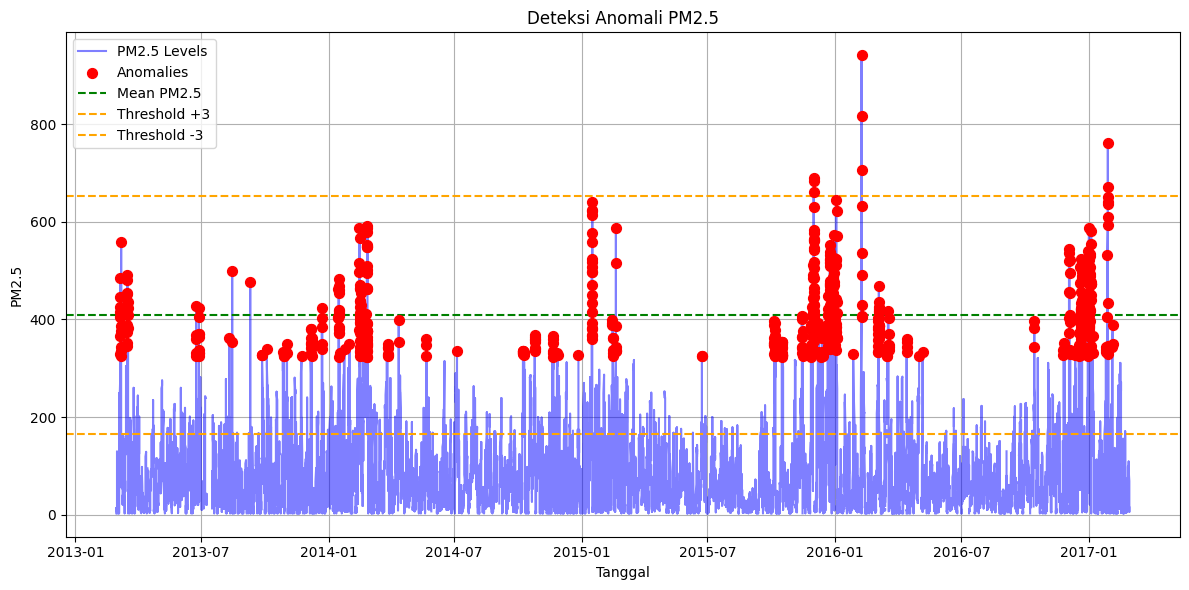

10 Anomali Tertinggi:
            PM2.5  PM2.5_zscore
date                           
2016-02-08  941.0     10.605564
2016-02-08  816.0      9.066756
2017-01-28  762.0      8.401992
2016-02-08  707.0      7.724916
2015-12-01  689.0      7.503328
2015-12-01  684.0      7.441776
2017-01-28  671.0      7.281740
2015-12-01  660.0      7.146325
2017-01-28  650.0      7.023220
2016-01-02  644.0      6.949358


In [58]:
# Calculate the Z-score for PM2.5
data['PM2.5_zscore'] = (data['PM2.5'] - data['PM2.5'].mean()) / data['PM2.5'].std()

# Define a threshold for identifying anomalies
threshold = 3

# Identify anomalies
anomalies = data[data['PM2.5_zscore'].abs() > threshold]

# Visualize the PM2.5 levels and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PM2.5'], label='PM2.5 Levels', color='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies['PM2.5'], color='red', label='Anomalies', s=50, zorder=5)
plt.title('Deteksi Anomali PM2.5')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5')
plt.axhline(y=anomalies['PM2.5'].mean(), color='green', linestyle='--', label='Mean PM2.5')
plt.axhline(y=anomalies['PM2.5'].mean() + threshold * data['PM2.5'].std(), color='orange', linestyle='--', label='Threshold +3')
plt.axhline(y=anomalies['PM2.5'].mean() - threshold * data['PM2.5'].std(), color='orange', linestyle='--', label='Threshold -3')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Menampilkan 10 anomali tertinggi
top_10_anomalies = top_anomalies_display.nlargest(10, 'PM2.5')[['PM2.5', 'PM2.5_zscore']]

# Menampilkan hasil
print("10 Anomali Tertinggi:")
print(top_10_anomalies)





### Penjelasan Hasil Anomali Tertinggi:

1. **Tanggal Anomali**:
   - **8 Februari 2016** memiliki tiga anomali tinggi (941.0, 816.0, 707.0).
   - **28 Januari 2017** juga menunjukkan nilai tinggi, dengan 762.0 sebagai yang tertinggi.

2. **Z-score**:
   - Z-score di atas 6 menunjukkan bahwa nilai PM2.5 sangat jauh dari rata-rata, menandakan potensi krisis kualitas udara.

## Conclusion

**Deskripsi Data**

Data yang dianalisis berfokus pada polusi udara di wilayah Shunyi, China, selama periode 2013 hingga 2017. Data ini mencakup berbagai variabel penting terkait kualitas udara dan kondisi cuaca, di antaranya:

- **PM2.5**: Konsentrasi partikel halus di udara (<2.5 mikrometer) yang berbahaya karena dapat terhirup dan masuk ke aliran darah.
- **Temperatur (TEMP)**: Suhu udara yang diukur, penting untuk memahami pengaruh cuaca terhadap polusi udara.
- **Variabel cuaca lainnya**: Kecepatan angin, tekanan udara, dan curah hujan, yang memengaruhi distribusi polutan dan tingkat polusi.

- **Penghitungan Z-score**: Z-score digunakan untuk mengukur seberapa jauh suatu nilai dari rata-rata data. Nilai dengan Z-score di atas ambang batas tertentu (biasanya 3) dianggap sebagai anomali.
- **Identifikasi Anomali**: Data PM2.5 yang memiliki Z-score tinggi menunjukkan kejadian luar biasa dalam tingkat polusi, yang perlu diselidiki lebih lanjut.

**Kesimpulan**

1. **Perubahan PM2.5 dari Tahun ke Tahun**:
   - Tingkat PM2.5 tidak stabil, terdapat fluktuasi dari tahun ke tahun.
   - **Temuan**: Bulan-bulan musim dingin (Desember-Februari) memiliki tingkat PM2.5 yang lebih tinggi dibandingkan bulan-bulan musim panas.
   - **Data**: Rata-rata tahunan menunjukkan peningkatan di bulan dingin, dengan puncaknya terjadi di bulan Desember.

2. **Hubungan Suhu dan PM2.5**:
   - Saat suhu udara turun, tingkat PM2.5 cenderung meningkat.
   - **Temuan**: Suhu yang lebih rendah berhubungan dengan peningkatan polusi udara.
   - **Data**: Korelasi negatif antara suhu dan PM2.5 menunjukkan bahwa semakin rendah suhu, semakin tinggi tingkat polusi, kemungkinan disebabkan oleh angin yang lebih tenang di musim dingin.

3. **Anomali yang perlu diperhatikan:**
  - **Krisis Kualitas Udara**: Anomali ini menunjukkan masalah serius dalam kualitas udara yang bisa disebabkan oleh kebakaran, aktivitas industri, atau cuaca ekstrem.
  - **Kepentingan Monitoring**: Penting untuk memantau lebih lanjut tanggal-tanggal ini untuk memahami penyebab dan mengambil tindakan mitigasi.
  - **Pengambilan Kebijakan**: Temuan ini dapat membantu dalam perumusan kebijakan untuk menangani polusi udara secara efektif.